# Beta Radiation
To find the range of $\beta$ radiation in aluminium and cardboard

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# background radiation
background = 36.75 # counts and an uncertainty of 7.5 counts

# aluminium absorber thicknesses in mg/cm^2
G = 130.7
H = 163.9
I = 206.7
J = 261.4
K = 323.5
L = 415.1
M = 531.5
N = 601
O = 669.6
P = 814

# import data
data_al = np.genfromtxt('exp3b_al.tsv', skip_header = 11)
counts_al = data_al[:,2] # counts with different number of absorbers

# list of the different thicknesses
al = [0, G, I, K, L, M, N, O, P, P+G, P+I, P+K, P+L, P+M, P+N]

# arrays of zero
logmean = np.zeros(15)
logdelta = np.zeros(15)

# for loop to calculate the log of the mean and uncertainty of the counts
for n in [0,2,4,6,8,10,12,14,16,18,20,22,24,25,26,28]: 
    logmean[int(n/2)] = np.log((counts_al[n]+counts_al[n+1])/2) # log of the mean
    logdelta[int(n/2)] = np.log(np.abs(counts_al[n]-counts_al[n+1])/2) # log of uncertainty


print(logmean, logdelta)

[8.7888221  8.22161335 7.87929149 7.34407285 6.83894096 6.14418563
 5.66469509 5.07829394 4.32413266 3.74950408 3.70130197 3.79548919
 3.66356165 3.71357207 3.8918203 ] [3.314186   3.34990409 1.94591015 1.38629436 2.01490302 3.76120012
 2.67414865 2.2512918  1.70474809 1.5040774  1.5040774  1.25276297
 0.         0.         1.79175947]


In [3]:
# fitting the curve
z = np.polyfit(al, logmean, 3)
p = np.poly1d(z)
z

array([ 4.04950998e-09, -5.83286552e-06, -3.23753718e-03,  8.79322923e+00])

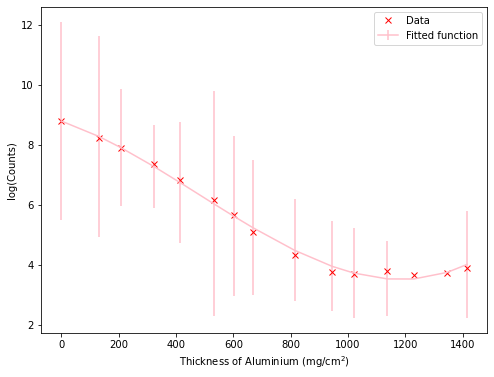

In [4]:
# plot the curve

plt.figure(figsize=(8, 6))
plt.plot(al, logmean, 'x', color = 'r', label='Data')
plt.errorbar(al, p(al), yerr=logdelta, color='pink', label = 'Fitted function')
#plt.xlim(800,1200)
plt.xlabel("Thickness of Aluminium (mg/cm$^2$)")
plt.ylabel("log(Counts)")
plt.legend(loc='best')
plt.show()

In [5]:
# background radiation
background = 36.75 # counts and an uncertainty of 7.5 counts

# cardboard absorber thicknesses in mg/cm^2
card = np.linspace(0, 14, 15)*101.58

# import data
data_card = np.genfromtxt('exp3b_cardboard.tsv', skip_header = 11)
counts_card = data_card[:,2] # counts with different number of absorbers

# arrays of zero
logmean = np.zeros(15)
logdelta = np.zeros(15)

# for loop to calculate the log of the mean and uncertainty of the counts
for n in [0,2,4,6,8,10,12,14,16,18,20,22,24,25,26,28]: 
    logmean[int(n/2)] = np.log((counts_card[n]+counts_card[n+1])/2) # log of the mean
    logdelta[int(n/2)] = np.log(np.abs(counts_card[n]-counts_card[n+1])/2) # log of uncertainty


print(logmean, logdelta)

[8.79807721 8.29853955 7.99311345 7.60165218 7.13129875 6.52502966
 5.87352525 5.11499531 4.35027794 3.83945231 3.70130197 3.72569343
 3.5695327  3.70130197 3.79548919] [ 4.16666522  3.87120101  0.40546511  0.91629073  3.06805294  1.79175947
  2.01490302  0.91629073 -0.69314718  0.40546511  0.91629073 -0.69314718
  1.25276297  0.40546511  1.25276297]


In [6]:
# fitting the curve
z = np.polyfit(card, logmean, 3)
p = np.poly1d(z)
z

array([ 4.92822932e-09, -8.15892511e-06, -1.69862534e-03,  8.70915020e+00])

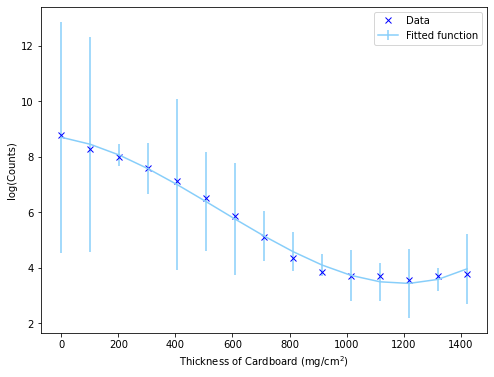

In [7]:
# plot the curve

plt.figure(figsize=(8, 6))
plt.plot(card, logmean, 'x', color = 'b', label='Data')
plt.errorbar(card, p(card), yerr=logdelta, color='lightskyblue', label = 'Fitted function')
#plt.xlim(800,1200)
plt.xlabel("Thickness of Cardboard (mg/cm$^2$)")
plt.ylabel("log(Counts)")
plt.legend(loc='best')
plt.show()